<a href="https://colab.research.google.com/github/yaroslavtsepkov/colab/blob/lab_0/Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix multiplication
### CPU (numpy) VS GPU(cupy)


In [ ]:
import numpy as np
import cupy as cp
import time
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
cp.cuda.Device()

<CUDA Device 0>

In [ ]:
def cpuMult(n):
    size = []
    time_cpu = []
    while n < 2000:
        s = time.time()
        size.append(n)
        matrix = np.random.uniform(size=(n,n))
        np.matmul(matrix, matrix)
        n += 50
        p = time.time()
        time_cpu.append(p-s)
    return size, time_cpu

In [ ]:
def gpuMult(n):
    size = []
    time_gpu = []
    while n < 2000:
        s = time.time()
        size.append(n)
        matrix = cp.random.uniform(size=(n,n))
        cp.matmul(matrix, matrix)
        n += 50
        p = time.time()
        time_gpu.append(p-s)
    return size, time_gpu

In [ ]:
size_list_cpu, time_list_cpu = cpuMult(100)
size_list_gpu, time_list_gpu = gpuMult(100)
time_cpu = np.array(time_list_cpu)
time_gpu = np.array(time_list_gpu)

In [ ]:
df = pd.DataFrame({
    'size_of_matrix': size_list_cpu,
    'time_for_CPU': time_cpu,
    'time_for_GPU': time_gpu,
    'boost': time_cpu / time_gpu
})
df

,size_of_matrix,time_for_CPU,time_for_GPU,boost
0,100,0.005153,0.002115,2.436915
1,150,0.001134,0.000145,7.824013
2,200,0.001852,0.000080,23.047478
3,250,0.001932,0.000067,28.946429
4,300,0.003088,0.000072,43.166667
5,350,0.004492,0.000065,69.264706
6,400,0.009173,0.000071,128.678930
7,450,0.008287,0.000084,99.022792
8,500,0.010121,0.000079,127.858434
9,550,0.012808,0.000183,69.946615


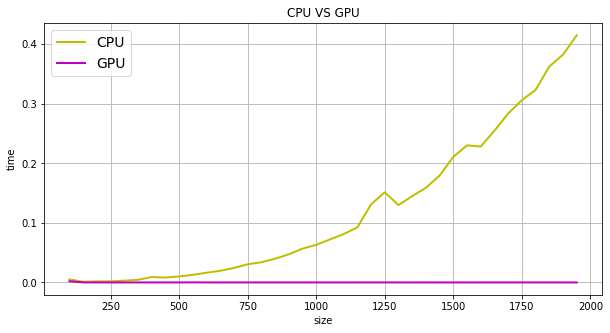

In [307]:
if size_list_cpu and size_list_gpu and time_list_cpu and time_list_gpu:
    fig, ax = plt.subplots()
    ax = plt.plot(size_list_cpu, time_list_cpu, color='y', label = 'CPU', linewidth=2)
    ax = plt.plot(size_list_gpu, time_list_gpu, color='m', label = 'GPU', linewidth=2)
    plt.legend(loc="upper left", fontsize=14)
    plt.xlabel('size')
    plt.ylabel('time')
    plt.title('CPU VS GPU')
    fig.set_figwidth(10)
    fig.set_figheight(5)
    plt.grid()
    plt.show()
else:
    print('No data to build graphs')